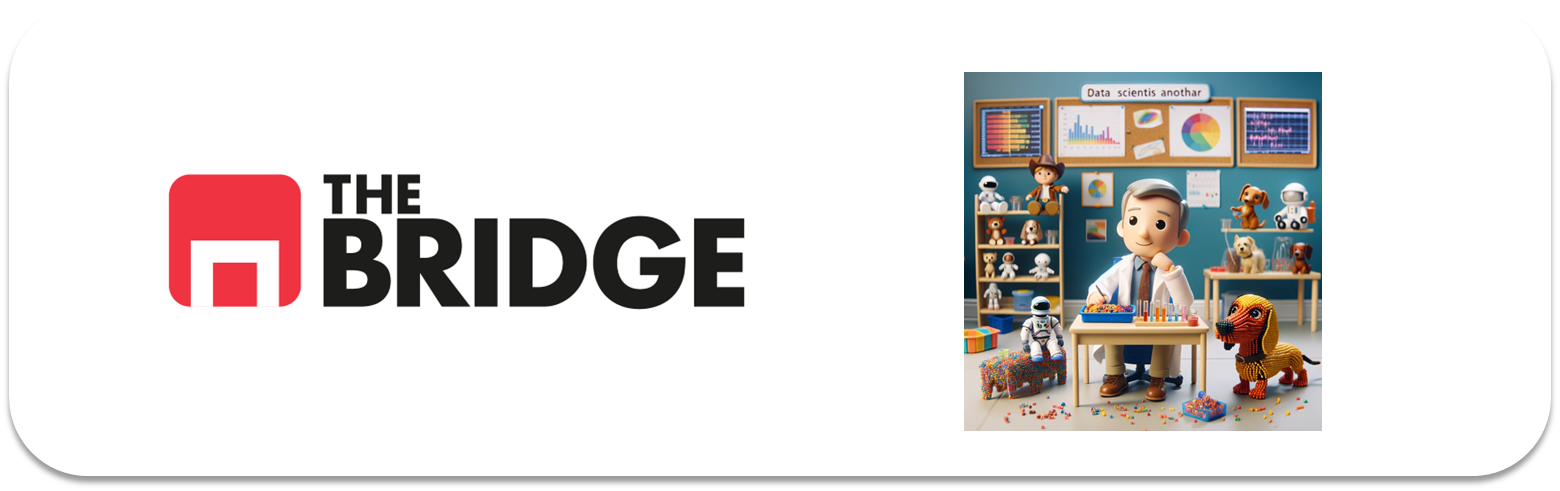

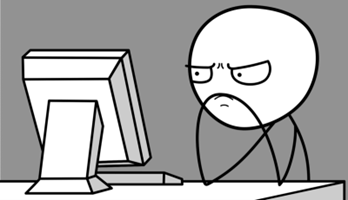

Para ejercitarte y afianzar lo aprendido sobre tendencias centrales, frecuencias, medidas de posición y rangos, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/admission_data.csv", muestra un parte de su contenido y la info general del mismo

In [3]:
with open ("./data/admission_data.csv") as f:
    df_admision = pd.read_csv(f)

display(df_admision.head(5))
print(df_admision.info())

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None


### Ejercicio 2

Como ya sabes este dataset queremos analizarlo para poder estudiar la posible discriminación en las admisiones de los departamentos universitarios. Analiza la variable `Year`, ¿qué crees que deberíamos hacer con esta variable?

### Ejercicio 3

Analiza ahora la columna `Major`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. Puedes emplear las funciones del notebook de visualizaciones del repo o bien la función `pinta_distribucion_categoricas` del módulo `bootcampviztools` y que hemos usado en el workout. (Tiene un argumento `relativa` para mostrar las frecuencias relativas y otro `mostrar_valores` para enseñar las etiquetas de los valores).

In [8]:
#Frecuencias absolutas (el nº de veces que aparece un valor en el conjunto de datos)
fa_major = df_admision["Major"].value_counts()
print(fa_major)

print()

#Frecuancias relativas (es la frecuencia absoluta pero dividida entre el total de datos)
fr_major = df_admision["Major"].value_counts(normalize=True)
print(fr_major)

Major
Other                                                      7924
Department of Physics and Astronomy                        1246
School of Medicine                                          918
Department of Mechanical Engineering                        792
Department of Psychology                                    714
Department of Economics                                     585
School of Political Science and International Relations     584
Name: count, dtype: int64

Major
Other                                                      0.620857
Department of Physics and Astronomy                        0.097626
School of Medicine                                         0.071927
Department of Mechanical Engineering                       0.062054
Department of Psychology                                   0.055943
Department of Economics                                    0.045836
School of Political Science and International Relations    0.045757
Name: proportion, dtype: float64


In [11]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

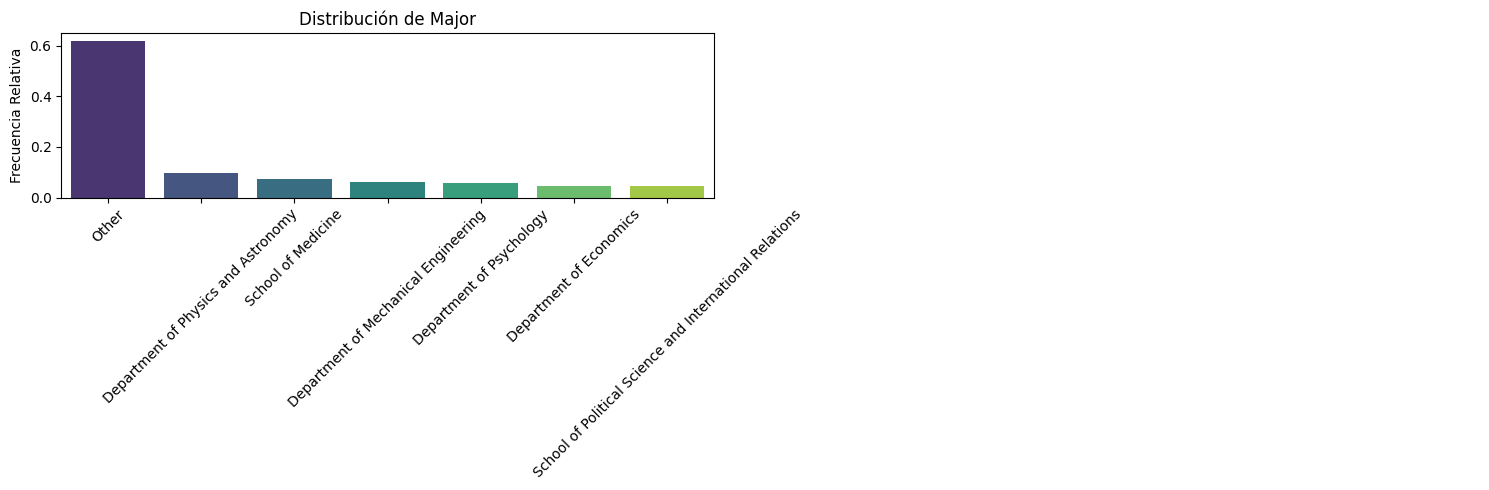

In [15]:
pinta_distribucion_categoricas(df_admision, ["Major"], relativa = True)

### Ejercicio 4

¿Qué puedes comentar de los datos anteriores?

La proporción de interesados en "otras" carreras es muchísimo mayor que en las carreras mencionadas en la gráfica

### Ejercicio 5

Analiza ahora la columna `Gender`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

Frecuencia absoluta:
 Gender
M    8442
F    4321
Name: count, dtype: int64

Frecuencia relativa:
 Gender
M    0.661443
F    0.338557
Name: proportion, dtype: float64


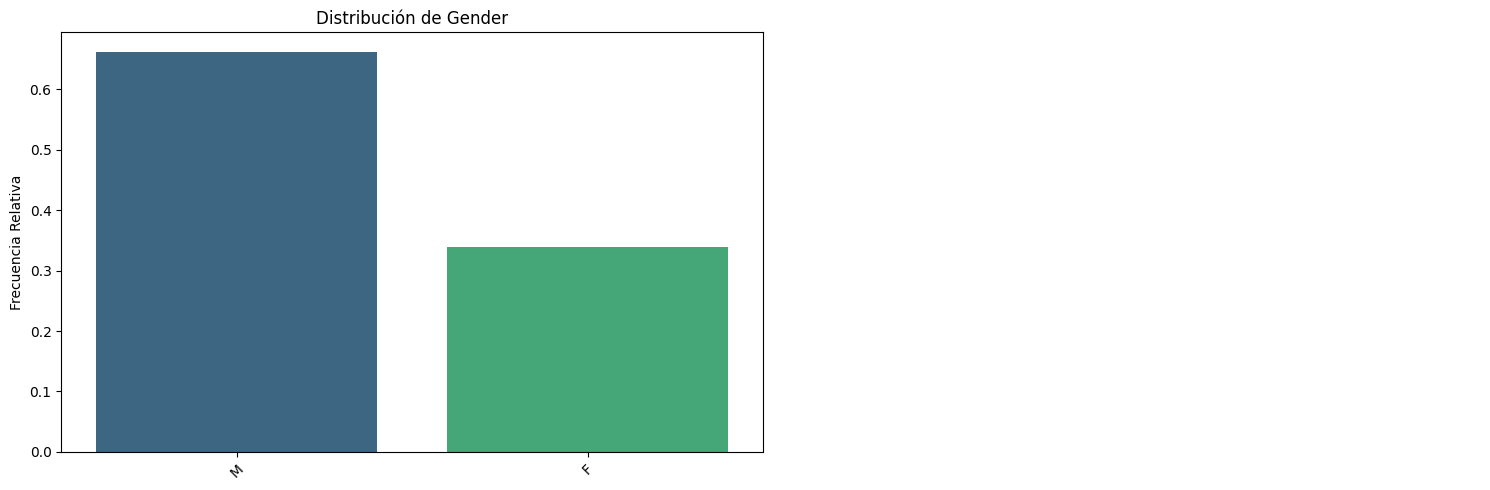

In [21]:
fa_gender = df_admision["Gender"].value_counts()
print("Frecuencia absoluta:\n",fa_gender)
print()
fr_gender = df_admision["Gender"].value_counts(normalize=True)
print("Frecuencia relativa:\n",fr_gender)

pinta_distribucion_categoricas(df_admision,["Gender"], relativa = True)

### Ejercicio 6

¿Qué puedes comentar de los datos anteriores?

Que 2/3 de los interesados, según la gráfica, eran hombres

### Ejercicio 7

Finalmente analiza, la columna `Admission`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

La frecuencia absoluta de la columna Admisión es:  Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64

La frecuencia relativa de la columna Admisión es:  Admission
Rejected    0.590065
Accepted    0.409935
Name: proportion, dtype: float64


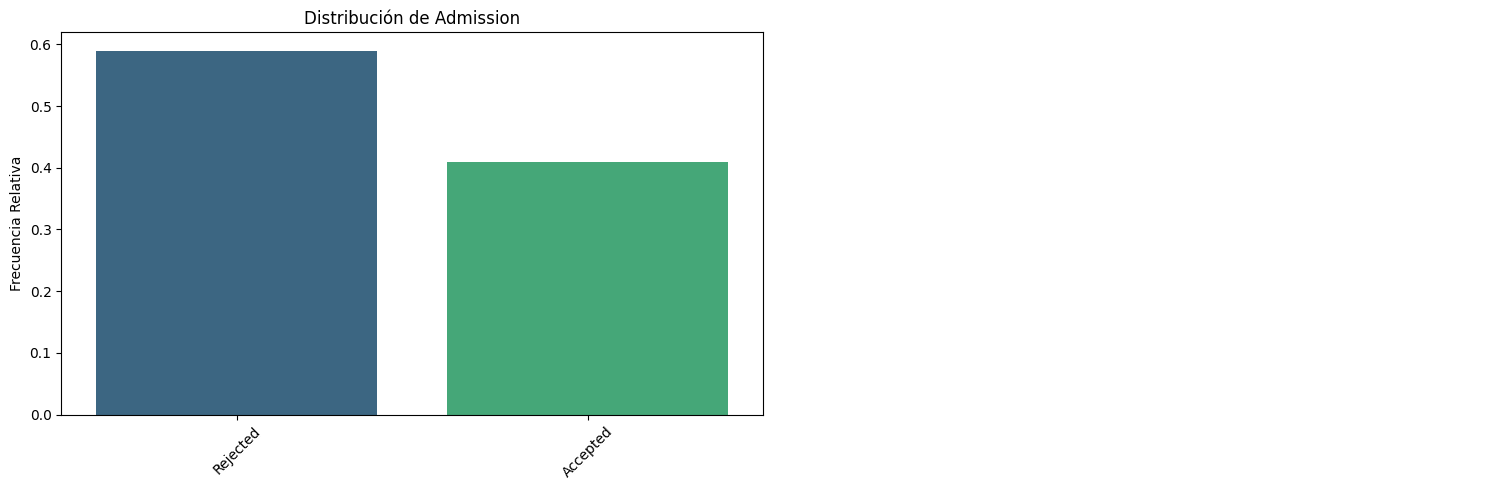

In [24]:
fa_admision = df_admision["Admission"].value_counts()
print("La frecuencia absoluta de la columna Admisión es: ", fa_admision)

fr_admision = df_admision["Admission"].value_counts(normalize = True)
print("\nLa frecuencia relativa de la columna Admisión es: ", fr_admision)

pinta_distribucion_categoricas(df_admision, ["Admission"], relativa = True)

### Ejercicio 8

¿Qué puedes comentar de los datos anteriores?

Casi un 60% de los interesados no fueron admitidos.


### Ejercicio 9

Carga en un dataframe los datos contenidos en la ruta "./data/tips.csv", muestra un parte de su contenido y la info general del mismo

In [25]:
with open("./data/tips.csv") as f :
    df_tips = pd.read_csv(f)

display(df_tips.head(5))
print(df_tips.info())


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB
None


### Ejercicio 10

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.

In [33]:
print("Las columnas numéricas son total_bill, tip y size")

indice = ["total_bill", "tip", "size"]
lista_media = []
lista_mediana = []
lista_Q1 = []
lista_Q2 = []
lista_Q3 = []
lista_RangoIntercuartilico = []

for i in range(len(indice)):
    columna = df_tips[indice[i]]
    lista_media.append(columna.mean())
    lista_mediana.append(columna.median())
    lista_Q1.append(columna.quantile(0.25))
    lista_Q2.append(columna.quantile(0.50))
    lista_Q3.append(columna.quantile(0.75))
    lista_RangoIntercuartilico.append(lista_Q3[i] - lista_Q1[i])


df_analisis_medidas_numericas = pd.DataFrame({"Indice" : indice,
                                "Media" : lista_media,
                                 "Mediana" : lista_mediana,
                                 "Q1" : lista_Q1,
                                 "Q2" : lista_Q2,
                                 "Q3" : lista_Q3,
                                 "IQR" : lista_RangoIntercuartilico
                                 })
df_analisis_medidas_numericas.set_index('Indice', inplace=True)


display(df_analisis_medidas_numericas)

Las columnas numéricas son total_bill, tip y size


,Media,Mediana,Q1,Q2,Q3,IQR
Indice,,,,,,
total_bill,19.785943,17.795,13.3475,17.795,24.1275,10.7800
tip,2.998279,2.900,2.0000,2.900,3.5625,1.5625
size,2.569672,2.000,2.0000,2.000,3.0000,1.0000


### Ejercicio 11

Para completar el análisis incial de las variables numéricas, muestra el diagrama de caja (*boxplot*) para cada una de las variables numéricas del dataset. ¿Qué puedes decir de ellas? (Puedes emplear las funciones incluidas en el notebook de visualizaciones sencillas o la función `plot_multiple_boxplots` de `bootcampviztools`, y que hemos empleado en el workout)

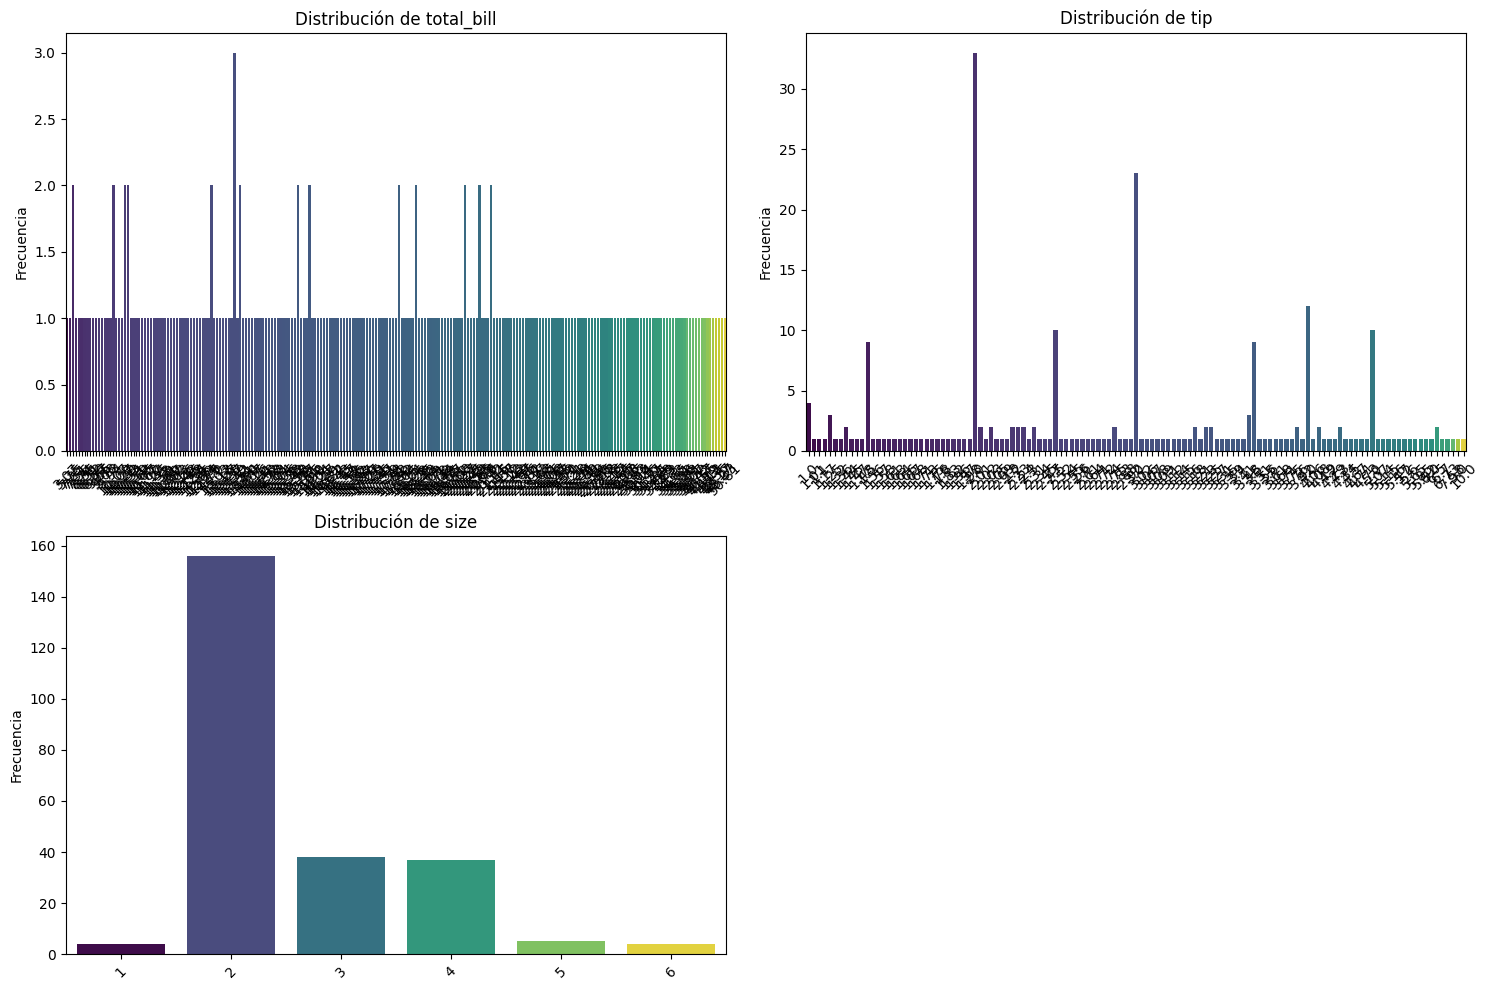

In [35]:
pinta_distribucion_categoricas(df_tips, indice)

### Ejercicio Extra #1:

Muestra las frecuencias absolutas y relativas de las variables categóricas del dataset. ¿Qué podrías destacar?

### Ejercicio Extra #2:

Carga en un dataframe el dataset de los seguros que tanto conoces ya ("./data/Marketing-Customer-Analysis.csv") y analiza cual es el perfil típico del cliente de la compañía a partir de las variables categóricas siguientes: `education, state, employmentstatus, gender, marital_status, vehicle_class, vehicle_size`. (Nota: en el workout lo hicimos a partir de las modas de dichos valores, pero no es la forma "precisa" de hacerlo, piensa en la "moda" sí pero de la combinación de valores)
